In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 5000)

In [13]:
cx_data = '/content/drive/MyDrive/1.Grey Atom/Its 51/DataFiles/Mahindra First Choice Dataset.zip (Unzipped Files)/Customer_Data.xlsx'
f_invoice = '/content/drive/MyDrive/1.Grey Atom/Its 51/DataFiles/Mahindra First Choice Dataset.zip (Unzipped Files)/Final_invoice.csv'
jtd_data = '/content/drive/MyDrive/1.Grey Atom/Its 51/DataFiles/Mahindra First Choice Dataset.zip (Unzipped Files)/JTD.csv'
p_master = '/content/drive/MyDrive/1.Grey Atom/Its 51/DataFiles/Mahindra First Choice Dataset.zip (Unzipped Files)/Plant Master.xlsx'

In [14]:
customer_data = pd.read_excel(cx_data)
final_invoice_data = pd.read_csv(f_invoice)
jtd_data = pd.read_csv(jtd_data)
plant_master_data = pd.read_excel(p_master) 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Working with *final invoice data*

In [15]:
final_invoice_data.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [16]:
def shape(df):

  print('Total no. of Columns :', df.shape[1]),print('Total no. of Rows    :', df.shape[0])

In [17]:
shape(final_invoice_data)

Total no. of Columns : 59
Total no. of Rows    : 492314


## Checking Null value_counts with %

In [18]:
def get_nulls(df):

  Null_Counts = df.isnull().sum().sort_values(ascending = False)
  Null_Percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
 
  Null_Counts_Percentage = pd.concat([ Null_Counts, Null_Percentage], axis=1, keys=['Null_Counts', 'Null_Percentage'])
  return Null_Counts_Percentage

In [19]:
null_final_invoice_data = get_nulls(final_invoice_data)
null_final_invoice_data

,Null_Counts,Null_Percentage
Service Advisor Name,492314,100.000000
Claim No.,487510,99.024200
Policy no.,475432,96.570888
Expiry Date,470083,95.484386
Insurance Company,468723,95.208140
Cash /Cashless Type,464894,94.430384
Gate Pass Date,451399,91.689247
Technician Name,236834,48.106290
IGST(18%),197286,40.073205
IGST(12%),197286,40.073205


## visualizing null values with missingno

In [ ]:
!pip install missingno
import missingno as msno

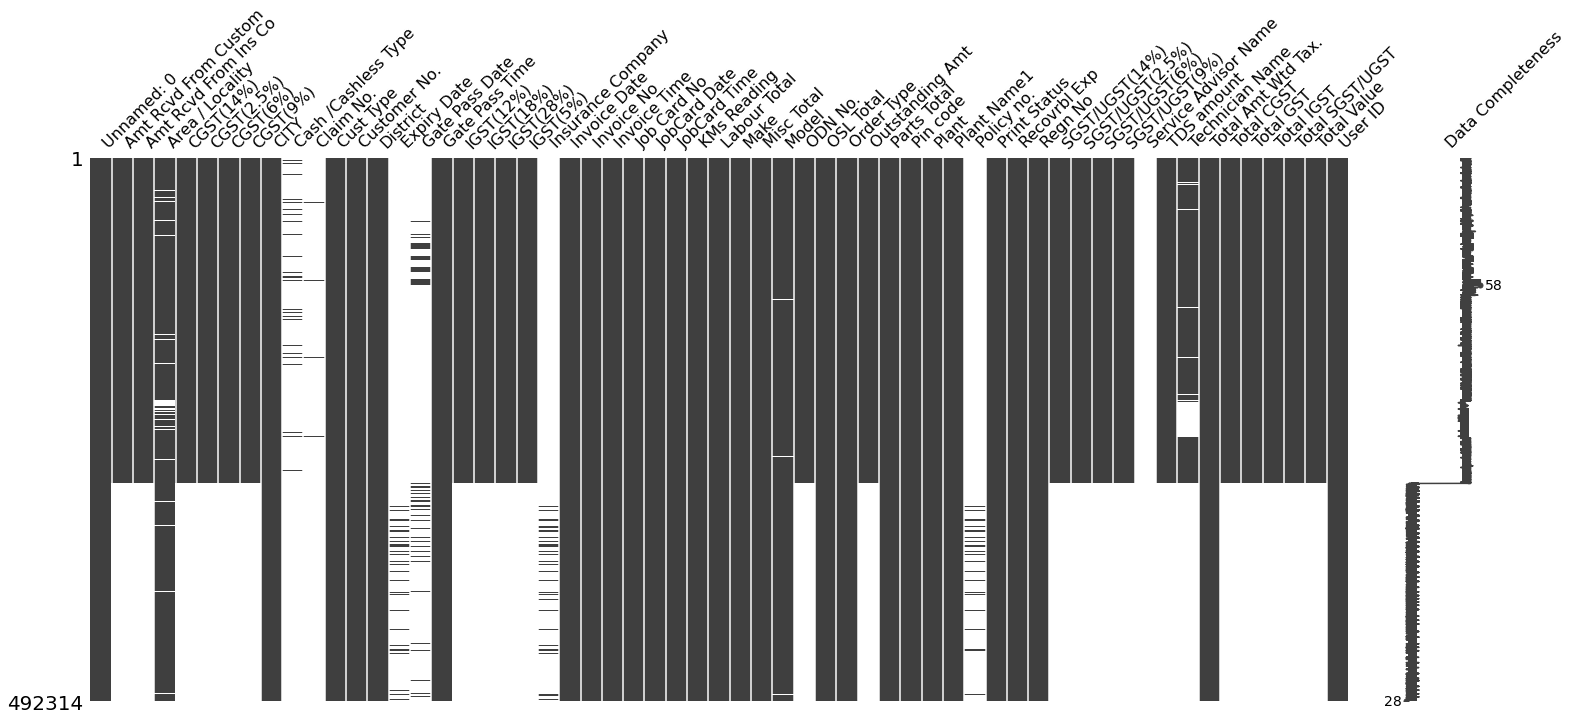

In [20]:
# Visualize missing values as a matrix 
# white spaces means null values
msno.matrix(final_invoice_data,labels=True) 

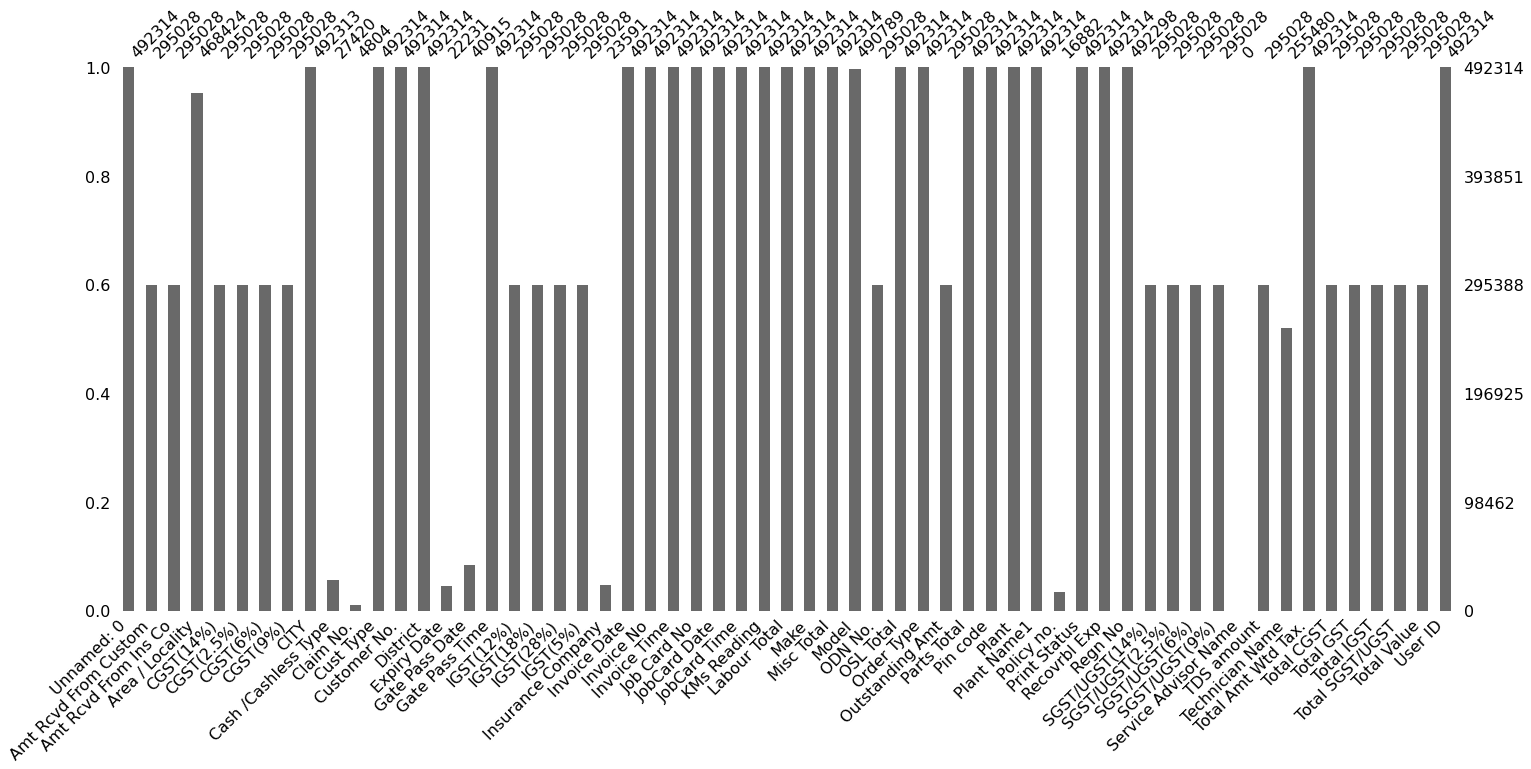

In [21]:
# white spaces means null values
msno.bar(final_invoice_data,labels=True)

Heatmap shows the correlation of missingness between every 2 columns. 



A value near -1 means if one variable appears then the other variable is very likely to be missing.

A value near 0 means there is no dependence between the occurrence of missing values of two variables.

A value near 1 means if one variable appears then the other variable is very likely to be present.

In [ ]:
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 
msno.heatmap(final_invoice_data) 

### dropping columns with more than 40% null values

In [22]:
# selecting cols with more than 40 % null values
def null_40(cols):
  cols_to_drop = cols[cols.Null_Percentage > 40]
  print(cols_to_drop.shape[0],'columns > 40 % null values \n')
  drop_cols = list(cols_to_drop.index.values)
  return drop_cols

In [23]:
null_40(null_final_invoice_data)

30 columns > 40 % null values 



['Service Advisor Name',
 'Claim No.',
 'Policy no.',
 'Expiry Date',
 'Insurance Company',
 'Cash /Cashless Type',
 'Gate Pass Date',
 'Technician Name',
 'IGST(18%)',
 'IGST(12%)',
 'Total Value',
 'CGST(14%)',
 'ODN No.',
 'Outstanding Amt',
 'CGST(9%)',
 'CGST(6%)',
 'IGST(28%)',
 'CGST(2.5%)',
 'IGST(5%)',
 'TDS amount',
 'Amt Rcvd From Custom',
 'Total SGST/UGST',
 'SGST/UGST(14%)',
 'Total IGST',
 'SGST/UGST(2.5%)',
 'SGST/UGST(6%)',
 'Total GST',
 'SGST/UGST(9%)',
 'Total CGST',
 'Amt Rcvd From Ins Co']

In [24]:
final_invoice_data.drop(columns=
                        ['Service Advisor Name', 'Claim No.', 'Policy no.', 'Expiry Date',
       'Insurance Company', 'Cash /Cashless Type', 'Gate Pass Date',
       'Technician Name', 'IGST(18%)', 'IGST(12%)', 'Total Value', 'CGST(14%)',
       'ODN No.', 'Outstanding Amt', 'CGST(9%)', 'CGST(6%)', 'IGST(28%)',
       'CGST(2.5%)', 'IGST(5%)', 'TDS amount', 'Amt Rcvd From Custom',
       'Total SGST/UGST', 'SGST/UGST(14%)', 'Total IGST', 'SGST/UGST(2.5%)',
       'SGST/UGST(6%)', 'Total GST', 'SGST/UGST(9%)', 'Total CGST',
       'Amt Rcvd From Ins Co'],inplace = True)

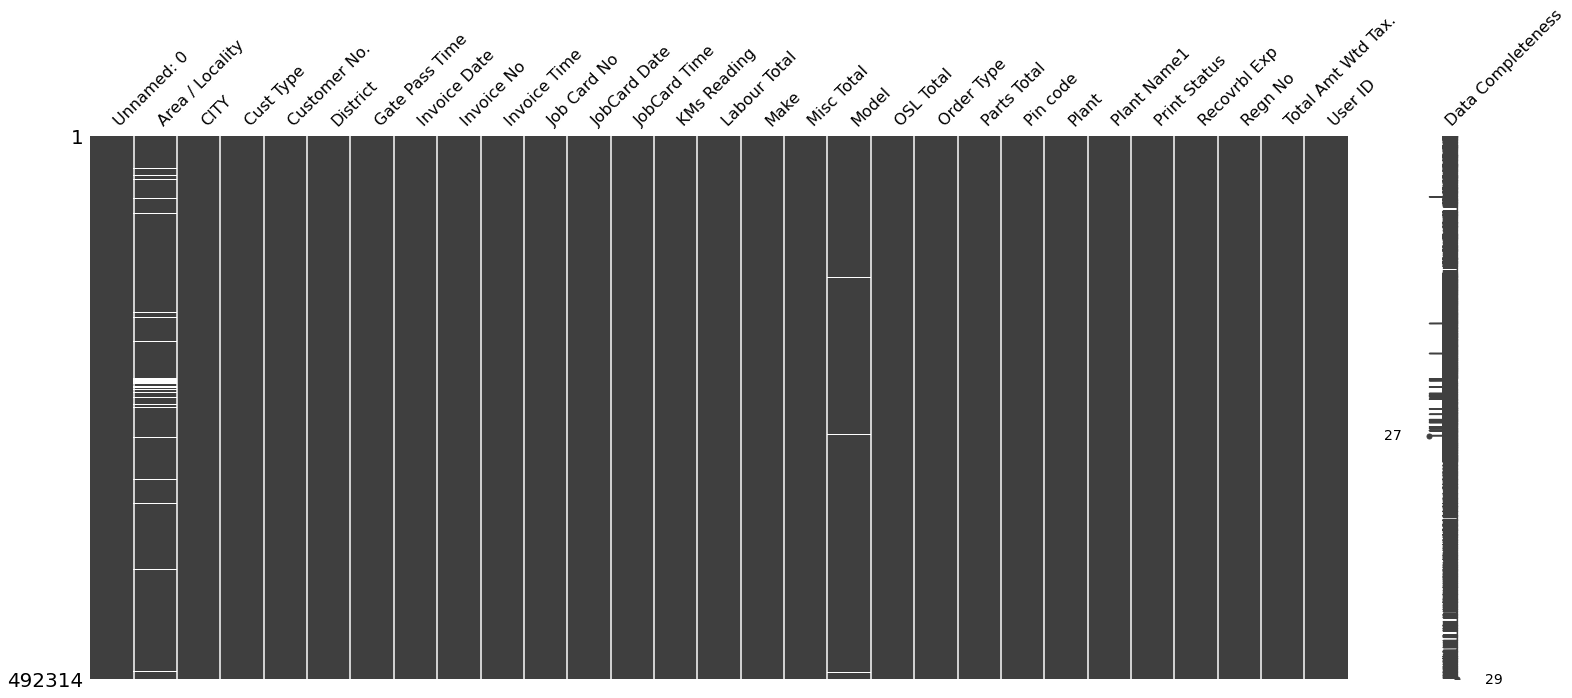

In [25]:
msno.matrix(final_invoice_data,labels=True) 

#f faf